In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Feature definitions
org_types = ['Insurance Provider/EAS', 'Private Practice', 'Public Health Provider', 'Home Care/Group Home']
team_sizes = ['1-2', '3-5', '6-15', '16-50', '51+']
client_volumes = ['<100', '100-500', '501-1000', '>1000']
service_models = ['1:1 therapy', 'Group care', 'High-volume intake', 'Mixed services']
specializations = ['General', 'Oncology/Cardiology/Neurology', 'Trauma-informed', 'Palliative/Complex']
readiness_timeline = ['1-3 months', '3-6 months', '6+ months', 'Unsure']
feature_needs = ['Basic self-guided', 'Real-time tracking', 'Affiliate integration', 'Multidimensional tracking']


In [3]:
def comprehensive_package_assignment(org_type, team_size, client_volume, service_model, specialization, timeline, features):
    """
    Comprehensive package assignment based on actual Cogni logic
    """
    
    # Base package 
    if org_type == 'Private Practice':
        if team_size in ['1-2', '3-5']:
            base_package = 'Fresh Start'
        elif team_size == '6-15':
            base_package = 'Practice Plus'
        else:
            base_package = 'Community Access'
    
    elif org_type == 'Public Health Provider':
        base_package = 'Enterprise Care'
    
    elif org_type == 'Insurance Provider/EAS':
        base_package = 'Enterprise Access'
    
    else:  # Home Care/Group Home
        if team_size in ['1-2', '3-5', '6-15']:
            base_package = 'Practice Plus'
        else:
            base_package = 'Community Access'
    
    
    # Service model adjustments
    if service_model in ['Group care', 'High-volume intake'] and base_package == 'Fresh Start':
        base_package = 'Practice Plus'
    
    # Feature-based upgrades
    if features in ['Real-time tracking', 'Multidimensional tracking'] and base_package == 'Fresh Start':
        base_package = 'Practice Plus'
    
    if features == 'Affiliate integration':
        if base_package in ['Fresh Start', 'Practice Plus']:
            base_package = 'Community Access'
    
    # Specialization adjustments
    if specialization in ['Oncology/Cardiology/Neurology', 'Trauma-informed', 'Palliative/Complex']:
        if base_package == 'Fresh Start':
            base_package = 'Practice Plus'
    
    # Volume-based adjustments
    if client_volume == '>1000' and base_package not in ['Enterprise Care', 'Enterprise Access']:
        base_package = 'Community Access'
    
    return base_package

In [4]:
def calculate_seats(team_size, client_volume):
    """Calculate recommended seats based on team size and client volume"""
    base_seats = {
        '1-2': 2,
        '3-5': 5,
        '6-15': 10,
        '16-50': 25,
        '51+': 50
    }
    
    # Adjust for high client volume
    seats = base_seats.get(team_size, 10)
    if client_volume == '>1000':
        seats = int(seats * 1.5)
    elif client_volume == '501-1000':
        seats = int(seats * 1.2)
    
    return min(seats, 100)  # Cap at 100 seats

In [5]:
# Generate more comprehensive synthetic data with better class balance
np.random.seed(42)
n_samples = 1000
data = []

# Define probabilities to ensure better class balance
org_probs = [0.3, 0.4, 0.15, 0.15]  # More balanced distribution
specialization_probs = [0.4, 0.2, 0.2, 0.2]  # More specialized cases

for i in range(n_samples):
    org_type = np.random.choice(org_types, p=org_probs)
    team_size = np.random.choice(team_sizes)
    client_volume = np.random.choice(client_volumes)
    service_model = np.random.choice(service_models)
    specialization = np.random.choice(specializations, p=specialization_probs)
    timeline = np.random.choice(readiness_timeline)
    features = np.random.choice(feature_needs)
    
    package = comprehensive_package_assignment(
        org_type, team_size, client_volume, service_model, 
        specialization, timeline, features
    )
    
    seats = calculate_seats(team_size, client_volume)
    
    data.append([
        org_type, team_size, client_volume, service_model,
        specialization, timeline, features, package, seats
    ])

# DataFrame
df = pd.DataFrame(data, columns=[
    'OrgType', 'TeamSize', 'ClientVolume', 'ServiceModel',
    'Specialization', 'Timeline', 'Features', 'Package', 'RecommendedSeats'
])
df.to_csv('cogni_synthetic_data.csv', index=False)
print("=== COMPREHENSIVE COGNI DATASET ===")
print(f"Dataset shape: {df.shape}")
print(f"Package distribution:")
print(df['Package'].value_counts())
print()

=== COMPREHENSIVE COGNI DATASET ===
Dataset shape: (1000, 9)
Package distribution:
Package
Community Access     365
Enterprise Access    313
Practice Plus        169
Enterprise Care      142
Fresh Start           11
Name: count, dtype: int64



In [6]:
df.head(10)

,OrgType,TeamSize,ClientVolume,ServiceModel,Specialization,Timeline,Features,Package,RecommendedSeats
0,Private Practice,51+,501-1000,High-volume intake,Trauma-informed,1-3 months,Affiliate integration,Community Access,60
1,Private Practice,6-15,501-1000,Mixed services,General,Unsure,Multidimensional tracking,Practice Plus,12
2,Private Practice,51+,100-500,Mixed services,Palliative/Complex,3-6 months,Real-time tracking,Community Access,50
3,Insurance Provider/EAS,51+,<100,Mixed services,Trauma-informed,1-3 months,Multidimensional tracking,Enterprise Access,50
4,Insurance Provider/EAS,6-15,501-1000,High-volume intake,General,Unsure,Multidimensional tracking,Enterprise Access,12
5,Private Practice,6-15,>1000,High-volume intake,Palliative/Complex,1-3 months,Affiliate integration,Community Access,15
6,Home Care/Group Home,51+,<100,High-volume intake,General,1-3 months,Multidimensional tracking,Community Access,50
7,Private Practice,3-5,<100,Group care,General,Unsure,Multidimensional tracking,Practice Plus,5
8,Private Practice,16-50,<100,Mixed services,General,3-6 months,Basic self-guided,Community Access,25
9,Insurance Provider/EAS,16-50,100-500,Group care,Oncology/Cardiology/Neurology,3-6 months,Multidimensional tracking,Enterprise Access,25


In [7]:
# Encoding all categorical features
encoders = {}
encoded_features = []

for col in ['OrgType', 'TeamSize', 'ClientVolume', 'ServiceModel', 'Specialization', 'Timeline', 'Features']:
    encoders[col] = LabelEncoder()
    df[f'{col}_enc'] = encoders[col].fit_transform(df[col])
    encoded_features.append(f'{col}_enc')

# Package encoder
package_encoder = LabelEncoder()
df['Package_enc'] = package_encoder.fit_transform(df['Package'])

In [8]:
# Preparing features and target
X = df[encoded_features]
y = df['Package_enc']

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train model
rf_comprehensive = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10)
rf_comprehensive.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# Make predictions
y_pred = rf_comprehensive.predict(X_test)

In [12]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"=== MODEL PERFORMANCE ===")
print(f"Accuracy: {accuracy:.4f}")
print()

=== MODEL PERFORMANCE ===
Accuracy: 0.9600



In [13]:
print("=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=package_encoder.classes_, zero_division=0))
print()

=== CLASSIFICATION REPORT ===
                   precision    recall  f1-score   support

 Community Access       0.92      1.00      0.96        72
Enterprise Access       0.98      1.00      0.99        61
  Enterprise Care       1.00      1.00      1.00        20
      Fresh Start       1.00      0.50      0.67         2
    Practice Plus       0.97      0.84      0.90        45

         accuracy                           0.96       200
        macro avg       0.98      0.87      0.90       200
     weighted avg       0.96      0.96      0.96       200




In [14]:
# Create and plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names, title="Confusion Matrix"):
    """
    Plot confusion matrix with custom styling
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create figure and axis
    plt.figure(figsize=(10, 8))
    
    # Create heatmap
    sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names,
                cbar_kws={'label': 'Count'})
    
    plt.title(title, fontsize=12, fontweight='bold', pad=20)
    plt.xlabel('Predicted Package', fontsize=12, fontweight='bold')
    plt.ylabel('Actual Package', fontsize=12, fontweight='bold')
    
    # Rotate labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Display the plot
    plt.show()
    
    return cm

=== CONFUSION MATRIX ===


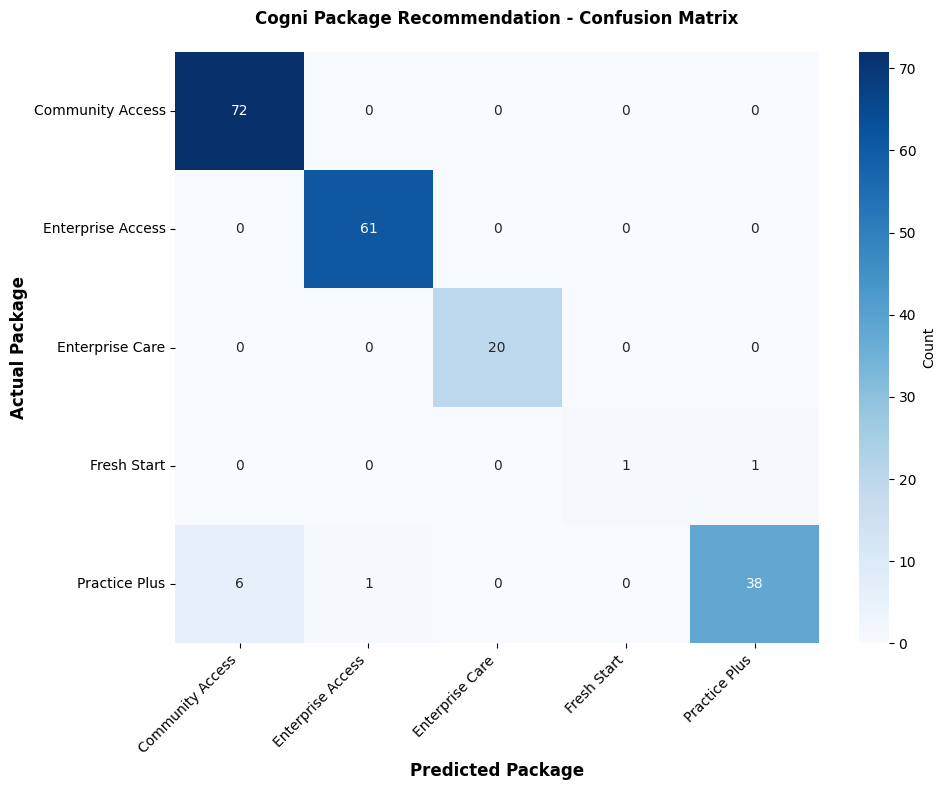

In [15]:
# Plot confusion matrix
print("=== CONFUSION MATRIX ===")
cm = plot_confusion_matrix(y_test, y_pred, package_encoder.classes_, 
                          "Cogni Package Recommendation - Confusion Matrix")

In [16]:
# Print confusion matrix statistics
print("Confusion Matrix (Raw Numbers):")
print(cm)
print()

Confusion Matrix (Raw Numbers):
[[72  0  0  0  0]
 [ 0 61  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0  1  1]
 [ 6  1  0  0 38]]



In [17]:
# Calculate per-class metrics from confusion matrix
print("=== PER-CLASS METRICS FROM CONFUSION MATRIX ===")
for i, class_name in enumerate(package_encoder.classes_):
    tp = cm[i, i]  # True positives
    fp = cm[:, i].sum() - tp  # False positives
    fn = cm[i, :].sum() - tp  # False negatives
    tn = cm.sum() - (tp + fp + fn)  # True negatives
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"{class_name}:")
    print(f"  True Positives: {tp}")
    print(f"  False Positives: {fp}")
    print(f"  False Negatives: {fn}")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall: {recall:.3f}")
    print(f"  F1-Score: {f1:.3f}")
    print()

=== PER-CLASS METRICS FROM CONFUSION MATRIX ===
Community Access:
  True Positives: 72
  False Positives: 6
  False Negatives: 0
  Precision: 0.923
  Recall: 1.000
  F1-Score: 0.960

Enterprise Access:
  True Positives: 61
  False Positives: 1
  False Negatives: 0
  Precision: 0.984
  Recall: 1.000
  F1-Score: 0.992

Enterprise Care:
  True Positives: 20
  False Positives: 0
  False Negatives: 0
  Precision: 1.000
  Recall: 1.000
  F1-Score: 1.000

Fresh Start:
  True Positives: 1
  False Positives: 0
  False Negatives: 1
  Precision: 1.000
  Recall: 0.500
  F1-Score: 0.667

Practice Plus:
  True Positives: 38
  False Positives: 1
  False Negatives: 7
  Precision: 0.974
  Recall: 0.844
  F1-Score: 0.905



In [18]:
print("=== FEATURE IMPORTANCE ===")
feature_names = ['OrgType', 'TeamSize', 'ClientVolume', 'ServiceModel', 'Specialization', 'Timeline', 'Features']
for name, importance in zip(feature_names, rf_comprehensive.feature_importances_):
    print(f"{name}: {importance:.4f}")
print()

=== FEATURE IMPORTANCE ===
OrgType: 0.6030
TeamSize: 0.1066
ClientVolume: 0.0764
ServiceModel: 0.0500
Specialization: 0.0433
Timeline: 0.0441
Features: 0.0766



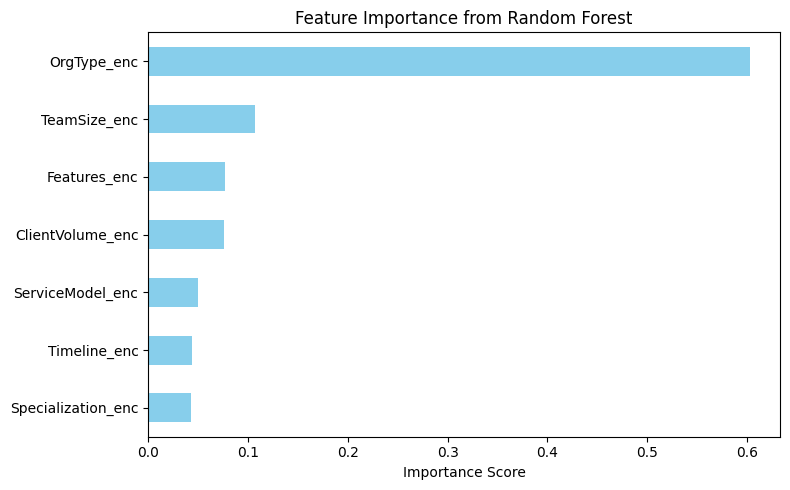

In [19]:
# Create a pandas Series with feature importances
feature_importance = pd.Series(rf_comprehensive.feature_importances_, index=X_train.columns)

# Sort and plot
plt.figure(figsize=(8, 5))
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [20]:
# Testing the recommendation system with examples
def predict_package(org_type, team_size, client_volume, service_model, specialization, timeline, features):
    """Predict package for new input"""
    
    # Encode inputs
    encoded_input = []
    feature_cols = ['OrgType', 'TeamSize', 'ClientVolume', 'ServiceModel', 'Specialization', 'Timeline', 'Features']
    inputs = [org_type, team_size, client_volume, service_model, specialization, timeline, features]
    
    for i, (col, value) in enumerate(zip(feature_cols, inputs)):
        try:
            encoded_value = encoders[col].transform([value])[0]
            encoded_input.append(encoded_value)
        except ValueError:
            print(f"Warning: Unknown value '{value}' for {col}")
            encoded_input.append(0)  # Default to first class
    
    # Create DataFrame with proper column names for prediction
    input_df = pd.DataFrame([encoded_input], columns=encoded_features)
    
    # Predict
    prediction = rf_comprehensive.predict(input_df)[0]
    package = package_encoder.inverse_transform([prediction])[0]
    
    # Calculate seats
    seats = calculate_seats(team_size, client_volume)
    
    return package, seats

In [21]:
# Test examples
print("=== TESTING RECOMMENDATION SYSTEM ===")
test_cases = [
    ("Private Practice", "3-5", "100-500", "1:1 therapy", "General", "1-3 months", "Basic self-guided"),
    ("Public Health Provider", "16-50", ">1000", "Group care", "Trauma-informed", "1-3 months", "Real-time tracking"),
    ("Insurance Provider/EAS", "51+", ">1000", "High-volume intake", "General", "1-3 months", "Affiliate integration"),
    ("Home Care/Group Home", "6-15", "501-1000", "Mixed services", "Palliative/Complex", "3-6 months", "Multidimensional tracking")
]

for i, test_case in enumerate(test_cases, 1):
    package, seats = predict_package(*test_case)
    print(f"Test Case {i}:")
    print(f"  Input: {test_case}")
    print(f"  Recommended Package: {package}")
    print(f"  Recommended Seats: {seats}")
    print()

=== TESTING RECOMMENDATION SYSTEM ===
Test Case 1:
  Input: ('Private Practice', '3-5', '100-500', '1:1 therapy', 'General', '1-3 months', 'Basic self-guided')
  Recommended Package: Fresh Start
  Recommended Seats: 5

Test Case 2:
  Input: ('Public Health Provider', '16-50', '>1000', 'Group care', 'Trauma-informed', '1-3 months', 'Real-time tracking')
  Recommended Package: Enterprise Care
  Recommended Seats: 37

Test Case 3:
  Input: ('Insurance Provider/EAS', '51+', '>1000', 'High-volume intake', 'General', '1-3 months', 'Affiliate integration')
  Recommended Package: Enterprise Access
  Recommended Seats: 75

Test Case 4:
  Input: ('Home Care/Group Home', '6-15', '501-1000', 'Mixed services', 'Palliative/Complex', '3-6 months', 'Multidimensional tracking')
  Recommended Package: Practice Plus
  Recommended Seats: 12



In [22]:
# Analysis of key decision factors
print("=== KEY INSIGHTS ===")
print("Most important factors for package recommendation:")
importance_pairs = list(zip(feature_names, rf_comprehensive.feature_importances_))
importance_pairs.sort(key=lambda x: x[1], reverse=True)

for factor, importance in importance_pairs:
    print(f"  {factor}: {importance:.3f}")

=== KEY INSIGHTS ===
Most important factors for package recommendation:
  OrgType: 0.603
  TeamSize: 0.107
  Features: 0.077
  ClientVolume: 0.076
  ServiceModel: 0.050
  Timeline: 0.044
  Specialization: 0.043


In [23]:
import requests
import json

# Test payload matching chatbot's data
payload = {
    "org_type": "Private Practice",
    "team_size": "1",
    "client_volume": "Less than 100"
}

try:
    response = requests.post(
        "https://cogni-recommendation.onrender.com/getRecommendation",
        json=payload,
        timeout=10 
    )
    
    print(f"Status Code: {response.status_code}")
    print("Response Body:")
    print(json.dumps(response.json(), indent=2))  
    
except requests.exceptions.RequestException as e:
    print(f"API Connection Failed: {str(e)}")

Status Code: 200
Response Body:
{
  "recommended_package": "Fresh Start",
  "recommended_seats": 4,
  "estimated_pricing": "$196",
  "key_features": "Self-guided tools, AI self-assessment, 1 group session/month, provider dashboard",
  "next_steps": "https://cogni-recommendation-chuiv5x8slzxktq3mzbb5p.streamlit.app/?tier=Fresh%20Start&seats=4",
  "sales_message": "Thank you for providing your details. Based on your responses, we recommend the *Fresh Start* package with 4 seats.\n\n**Estimated Price**: $196  \n**Key Features**: Self-guided tools, AI self-assessment, 1 group session/month, provider dashboard  \n[Click here to find out more](https://cogni-recommendation-chuiv5x8slzxktq3mzbb5p.streamlit.app/?tier=Fresh%20Start&seats=4)"
}
